# Lab 02
## Conrad Appel & Eric Hawkins

For this project, we used a data set called "[Comcast Customer Complaints](https://www.kaggle.com/archaeocharlie/comcastcomplaints)", which was uploaded to Kaggle by user Charlie H. The data set consists of CSVs, one containing information about customer complaints to Comcast and another containing information about customer complaints to the FCC about Comcast. Charlie H. scraped the data from consumeraffairs.com and cityexplainer after an overly lengthy support call in order to see if other customers had a similar experience.

Comcast is notorious for having bad customer service. By examining the complaints in this data set, we hoped to find what sorts of negative experiences have fueled this negative perception of the company's customer support.

In [69]:
import pandas as p
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import seaborn as s
import matplotlib.pyplot as plt
from wordcloud import WordCloud # conda install -c https://conda.anaconda.org/amueller wordcloud
%matplotlib inline

In [49]:
data = p.read_csv('comcast-fcc-complaints-2015.csv')
print("Number of documents: " + str(len(data)))

Number of documents: 2225


In [46]:
bow_vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
bow = bow_vectorizer.fit_transform(data['Description'])

bow_df = p.DataFrame(data=bow.toarray(), columns=bow_vectorizer.get_feature_names())
print("Vocabulary size: "+str(len(bow_vectorizer.vocabulary_)))

Vocabulary size: 12441


In [41]:
tfidf_transformer = TfidfVectorizer(stop_words=stopwords.words('english'))
tfidf = tfidf_transformer.fit_transform(data['Description'])

tfidf_df = p.DataFrame(data=tfidf.toarray(), columns=tfidf_transformer.get_feature_names())

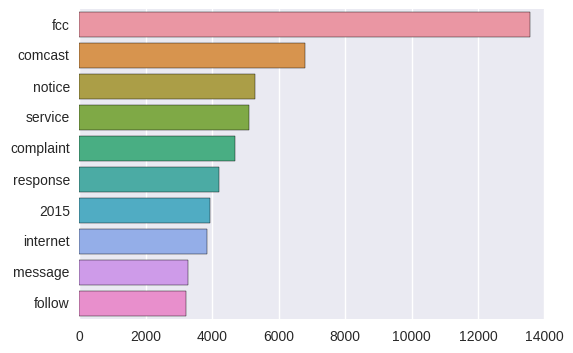

In [42]:
# top 10 words used
top_used_words = bow_df.sum().sort_values(ascending=False)[:10]

top_ax = s.barplot(top_used_words.values, top_used_words.index, orient="h")

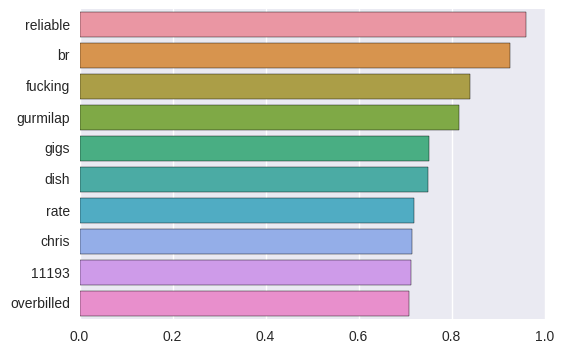

In [43]:
# heaviest weighted words
heaviest_words = tfidf_df.max().sort_values(ascending=False)[:10]

hv_ax = s.barplot(heaviest_words.values, heaviest_words.index, orient="h")

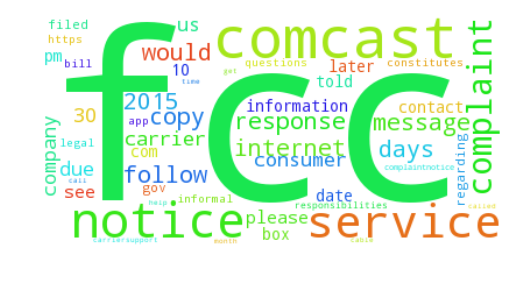

In [86]:
wc = WordCloud(max_words=50, background_color="white").generate_from_frequencies(bow_df.sum().sort_values(ascending=False).iteritems())
plt.axis("off")
wc_ax = plt.imshow(wc)